# Two Classes (Binary Classification)
Here we will demonstrate the confusion matrix, accuracy, precision, recall, F1 score, specificity, ROC, and ROC AUC for binary classification using a kNN model.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Generate synthetic binary classification dataset
X_binary, y_binary = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

In [4]:
# Initialize and fit a KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors for different behavior
classifier.fit(X_train, y_train);

In [5]:
# Make predictions
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

In [6]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[118  17]
 [ 34 131]]


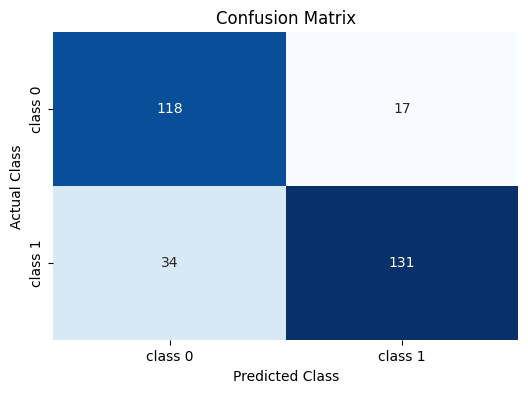

In [7]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["class 0", "class 1"], 
            yticklabels=["class 0", "class 1"])

plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');

In [8]:
# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity using recall_score with pos_label=0
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.83
Precision: 0.8851351351351351
Recall: 0.793939393939394
F1 Score: 0.8370607028753994
Specificity: 0.8740740740740741


In [9]:
# Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["class 0", "class 1"]))


Classification Report:
               precision    recall  f1-score   support

     class 0       0.78      0.87      0.82       135
     class 1       0.89      0.79      0.84       165

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



ROC AUC Score: 0.8845566778900114


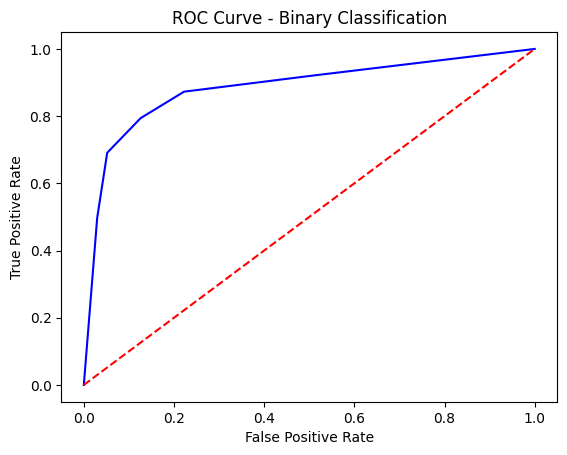

In [10]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification');

Text(0.5, 1.0, 'ROC Curve - Custom Thresholds')

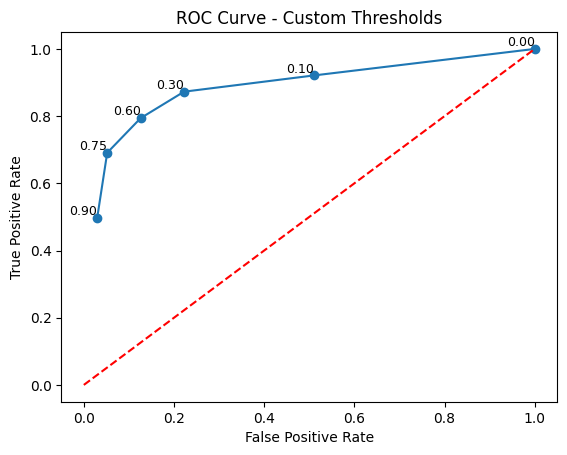

In [11]:
# Define custom thresholds
custom_thresholds = [0, 0.1, 0.3, 0.6, 0.75, 0.9]

# Initialize lists to store TPR (True Positive Rate) and FPR (False Positive Rate)
tpr_list = []
fpr_list = []

# Compute FPR and TPR for each custom threshold
for thresh in custom_thresholds:
    y_pred_custom = np.where(y_pred_prob >= thresh, 1, 0)  # Apply custom threshold
    fpr, tpr, _ = roc_curve(y_test, y_pred_custom)  # Get FPR and TPR for the threshold
    tpr_list.append(tpr[1])
    fpr_list.append(fpr[1])

# Plot ROC curve with custom thresholds
plt.figure()
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)

# Annotate each point with its corresponding threshold value
for i, thresh in enumerate(custom_thresholds):
    plt.text(fpr_list[i], tpr_list[i], f'{thresh:.2f}', fontsize=9, 
             verticalalignment='bottom', horizontalalignment='right')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Custom Thresholds')


# More than two classes
Here we will demonstrate the confusion matrix, accuracy, precision, recall, F1 score for ternary classification using a kNN model.
 No ROC curve exist here, but but you can create one-per-class if needed.

In [12]:
# Generate synthetic ternary classification dataset
X_ternary, y_ternary = make_classification(n_samples=1000, n_clusters_per_class=1, n_features=50, n_classes=3, random_state=42)

In [13]:
# Split the data into training and test sets
X_train_ter, X_test_ter, y_train_ter, y_test_ter = train_test_split(X_ternary, y_ternary, test_size=0.3, random_state=42)

In [14]:
# Initialize and fit a KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_ter, y_train_ter);

In [15]:
# Make predictions
y_pred_ter = classifier.predict(X_test_ter)

In [16]:
# Confusion Matrix
conf_matrix_ter = confusion_matrix(y_test_ter, y_pred_ter)
print("Confusion Matrix:\n", conf_matrix_ter)

Confusion Matrix:
 [[56 12 24]
 [24 89  2]
 [23  9 61]]


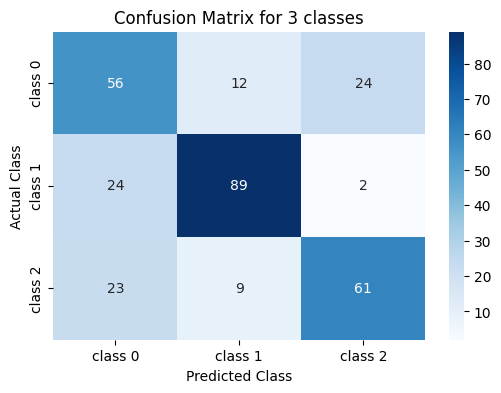

In [17]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ter, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["class 0", "class 1", "class 2"], 
            yticklabels=["class 0", "class 1", "class 2"])
plt.title('Confusion Matrix for 3 classes')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');

In [18]:
# Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test_ter, y_pred_ter, target_names=["class 0", "class 1", "class 2"]))


Classification Report:
               precision    recall  f1-score   support

     class 0       0.54      0.61      0.57        92
     class 1       0.81      0.77      0.79       115
     class 2       0.70      0.66      0.68        93

    accuracy                           0.69       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.69      0.69       300

